In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Data analysis

In [2]:
df = pd.read_csv('winequality-red.csv')

Data Description

Input variables (based on physicochemical tests):
1. fixed acidity : most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
2. volatile acidity : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
3. citric acid : found in small quantities, citric acid can add 'freshness' and flavor to wines.
4. residual sugar : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
5. chlorides : the amount of salt in the wine.
6. free sulfur dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
7. total sulfur dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
8. density : the density of water is close to that of water depending on the percent alcohol and sugar content.
9. pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
10. sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
11. alcohol : the percent alcohol content of the wine.

Output variable (based on sensory data):
12. quality : score between 0 and 10 given by human wine tasters.

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Dataset is clean without nulls.

In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

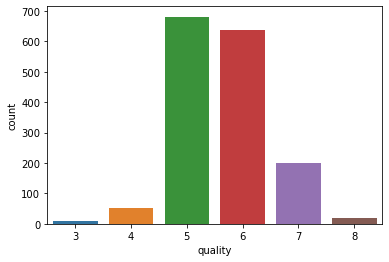

In [6]:
#count of the target variable
sns.countplot(x='quality',data=df)

We notice big value count disbalance in our target variable. 5th quality group with most values is even 68.1 times bigger than 3rd group with least values.

In [7]:
# mean variables values grouped by target variable - quality
df[['quality','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].groupby('quality').mean().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.36,0.88,0.17,2.64,0.12,11.00,24.90,1.0,3.40,0.57,9.96
4,7.78,0.69,0.17,2.69,0.09,12.26,36.25,1.0,3.38,0.60,10.27
5,8.17,0.58,0.24,2.53,0.09,16.98,56.51,1.0,3.30,0.62,9.90
6,8.35,0.50,0.27,2.48,0.08,15.71,40.87,1.0,3.32,0.68,10.63
7,8.87,0.40,0.38,2.72,0.08,14.05,35.02,1.0,3.29,0.74,11.47
8,8.57,0.42,0.39,2.58,0.07,13.28,33.44,1.0,3.27,0.77,12.09


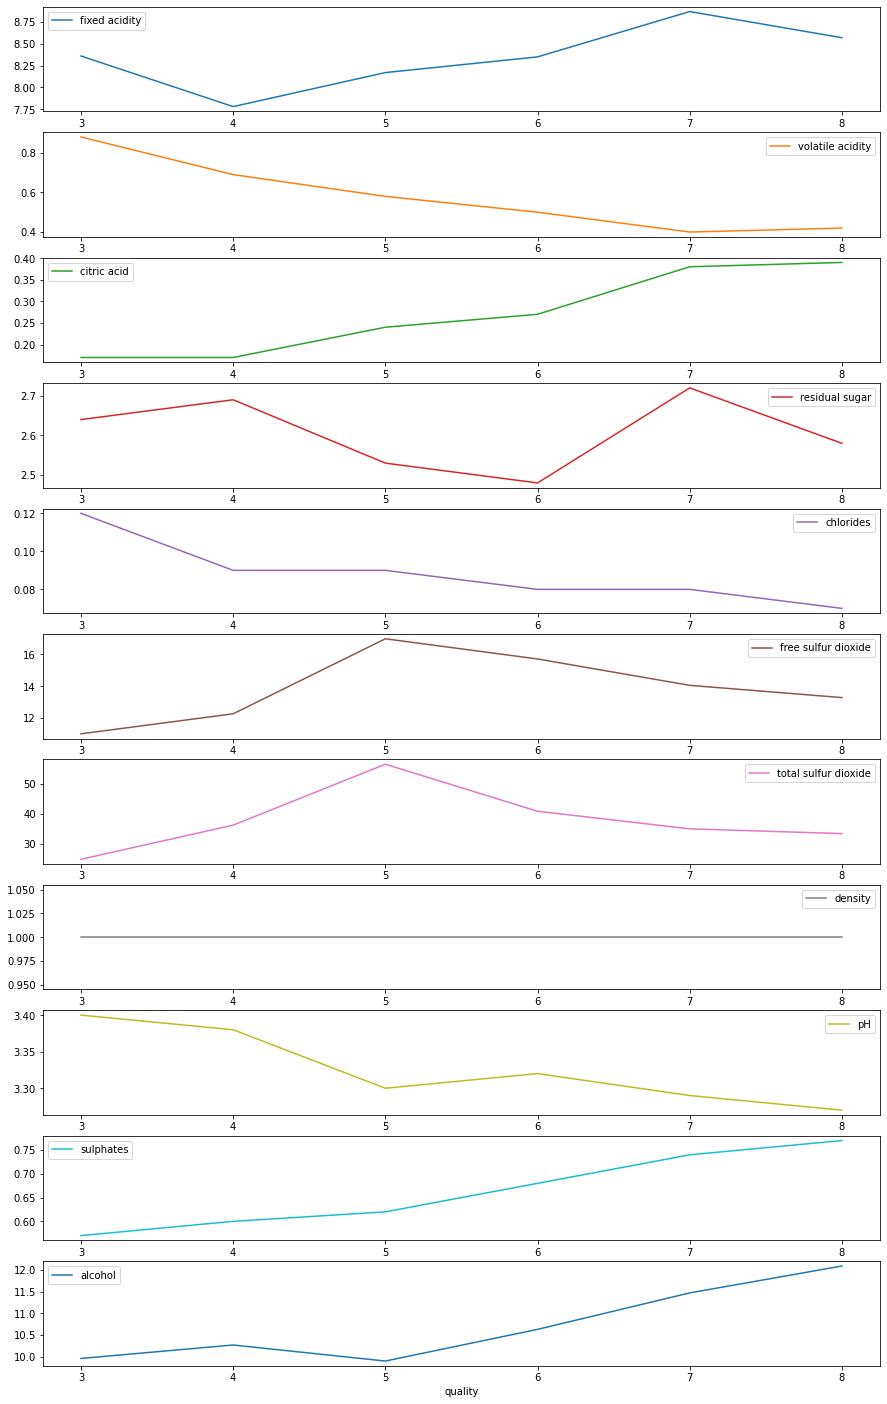

In [8]:
# looking for linear variables corelation to target variable
data = pd.DataFrame(df[['quality','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].groupby('quality').mean().round(2))

data.plot(subplots=True, sharex=False, figsize=(15,25))
plt.show()

From plot figures above we can see that these variables mean values have linear dependence to quality: Volatile acidicy Citric acid, chlorides, sulphates and alcohol.

volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

chlorides: the amount of salt in the wine

sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

alcohol: the percent alcohol content of the wine

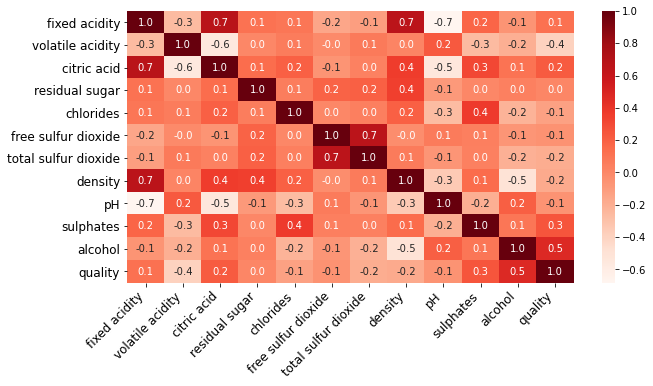

In [9]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="Reds")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

In [10]:
# Finding the correlation bewteen the Features and quality.
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

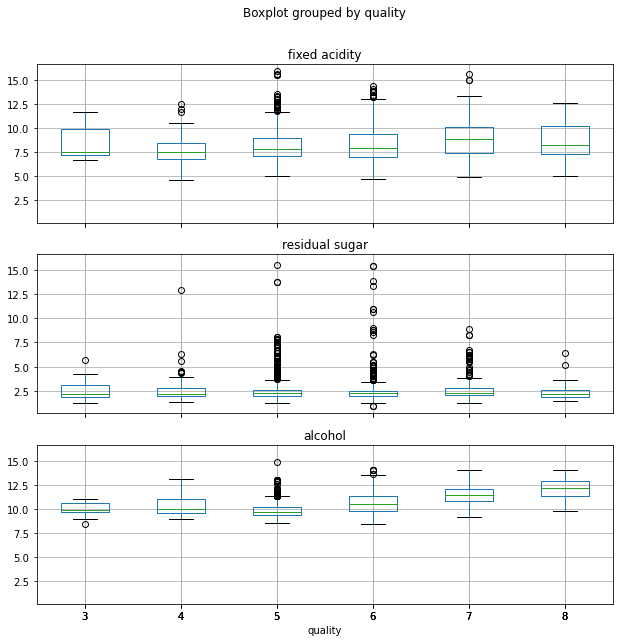

In [11]:
# looking for outliers using boxplots
boxplot = df.boxplot(column=['fixed acidity', 'residual sugar', 'alcohol'], 
                    by='quality',
                    layout=(3, 1), figsize=(10,10))

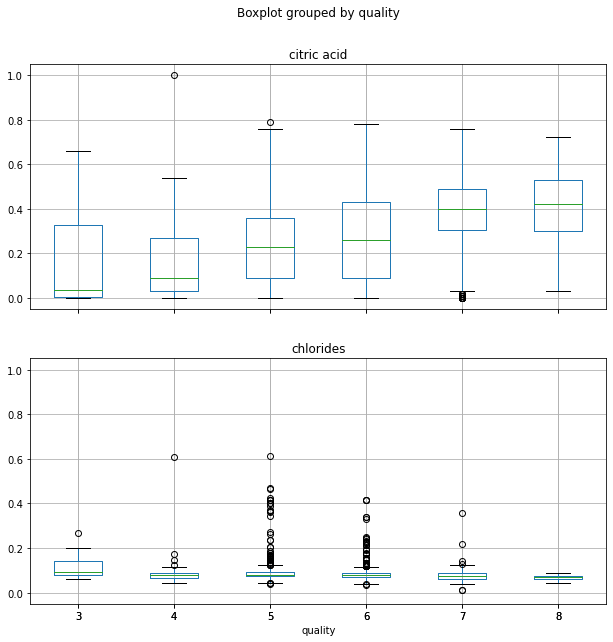

In [12]:
boxplot = df.boxplot(column=['citric acid', 'chlorides'], 
                    by='quality',
                    layout=(2, 1), figsize=(10,10))

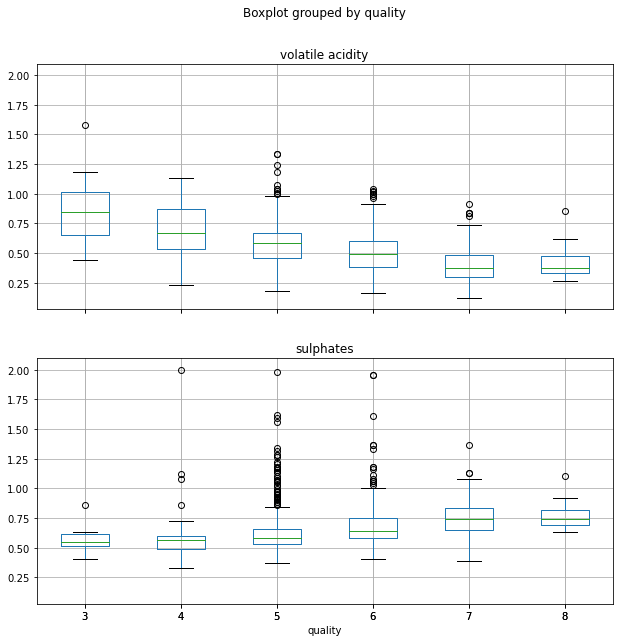

In [13]:
boxplot = df.boxplot(column=['volatile acidity', 'sulphates'], 
                    by='quality',
                    layout=(2, 1), figsize=(10,10))

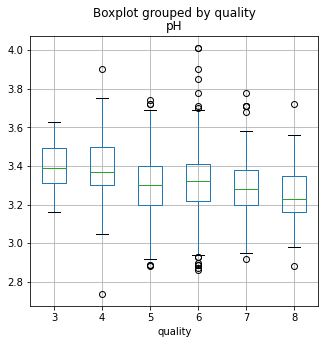

In [14]:
boxplot = df.boxplot(column=['pH'], 
                    by='quality', figsize=(5,5))

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Boxplots show many outliers for several columns. 
Most of the outliers are in 5th and 6th quality groups. But it is understandable because of big target variable group disbalance.
fixed acidity - 25% - 7.1 and 50% - 7.9. Not much variance. Could explain the outliers. Same reason for volatile acidity.
residual sugar - min - 0.9, max - 15!! Too big value difference. Same with chlorides, free sulfur dioxide and total sulfur dioxide columns.

# Data processing

In [16]:
'''
Dividing quality into classes:
        1-4 - bad     (1)
        5-6 - average (2)
        7-10 - good   (3)
'''
quality_class = []
for i in df['quality']:
    if i >= 1 and i <= 4:
        quality_class.append(1)
    elif i >= 5 and i <= 6:
        quality_class.append(2)
    elif i >= 7 and i <= 10:
        quality_class.append(3)
df['Quality_class'] = quality_class

In [17]:
df.drop(columns=['quality'], inplace=True)

In [18]:
df['Quality_class'].value_counts()

2    1319
3     217
1      63
Name: Quality_class, dtype: int64

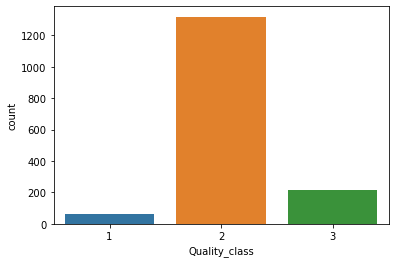

In [19]:
# We see that 2nd quality class is very big comparing to other two classes.
sns.countplot(x='Quality_class',data=df)

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [21]:
# Separate input features and target
target = 'Quality_class'
parameters = list(df)
parameters.remove('Quality_class')
# Defining y and x values
y = df[target]
x = df[parameters]

In [22]:
# data processing using StandardScaler
ss = StandardScaler()
X = ss.fit_transform(x)

In [24]:
# Principal component analysis (PCA)
pca_new = PCA(n_components=2)
Components = pca_new.fit_transform(X)
principalDf = pd.DataFrame(data = Components, 
                           columns = ['component 1', 'component 2'])

In [25]:
# concatenate new generated columns to our dataframe
finalDf = pd.concat([df[parameters], principalDf, df[target]], axis = 1)
finalDf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,component 1,component 2,Quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1.619530,0.450950,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-0.799170,1.856553,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-0.748479,0.882039,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2.357673,-0.269976,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1.619530,0.450950,2


In [26]:
finalDf.shape

(1599, 14)

In [27]:
# Alcohol has biggest positive correlation to Quality class and Volatile acidity has biggest negative correlation.
df.corr()['Quality_class'].sort_values(ascending=False)

Quality_class           1.000000
alcohol                 0.361363
citric acid             0.228930
sulphates               0.205409
fixed acidity           0.125886
residual sugar          0.030153
free sulfur dioxide    -0.025075
total sulfur dioxide   -0.081960
pH                     -0.093946
chlorides              -0.098829
density                -0.123566
volatile acidity       -0.333816
Name: Quality_class, dtype: float64

### Dropping Outliers from Quality_class - 2

In [28]:
# dropping 2nd quality class outliers
finalDf.drop(finalDf[(finalDf.sulphates > 0.8) & (finalDf.Quality_class == 2)].index, inplace=True)
finalDf.drop(finalDf[(finalDf.chlorides > 0.15) & (finalDf.Quality_class == 2)].index, inplace=True)
finalDf.drop(finalDf[(finalDf.alcohol > 12.5) & (finalDf.Quality_class == 2)].index, inplace=True)
finalDf.drop(finalDf[(finalDf['residual sugar'] > 3.7) & (finalDf.Quality_class == 2)].index, inplace=True)
finalDf.drop(finalDf[(finalDf['fixed acidity'] > 12) & (finalDf.Quality_class == 2)].index, inplace=True)

In [29]:
finalDf.shape

(1267, 14)

In [30]:
finalDf['Quality_class'].value_counts()

2    987
3    217
1     63
Name: Quality_class, dtype: int64

In [31]:
# Again separate input features and target
y = finalDf[target]
finalDf.drop(columns=['Quality_class'], inplace=True)
X = finalDf

### Oversampling data

In [33]:
# before oversampling setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [34]:
# before oversampling concatenate back training data
X_Df = pd.concat([X_train, y_train], axis=1)

In [35]:
X_Df['Quality_class'].value_counts()

2    736
3    168
1     46
Name: Quality_class, dtype: int64

In [36]:
df_majority = X_Df[X_Df.Quality_class == 2]
df_minority = X_Df[X_Df.Quality_class == 1]
df_minority_1 = X_Df[X_Df.Quality_class == 3]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples=150,    
                                 random_state=42) 

df_minority_upsampled_1 = resample(df_minority_1, 
                                 replace=True,     
                                 n_samples=300,    
                                 random_state=42)  

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled, df_minority_upsampled_1])
 
# Display new class counts
df_upsampled.Quality_class.value_counts()

2    736
3    300
1    150
Name: Quality_class, dtype: int64

In [37]:
df_upsampled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,component 1,component 2,Quality_class
188,7.9,0.50,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5,0.330313,1.812033,2
1312,8.0,1.18,0.21,1.9,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,-1.847019,0.583775,2
1464,6.8,0.59,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7,-1.557950,1.236190,2
186,7.4,0.39,0.48,2.0,0.082,14.0,67.0,0.99720,3.34,0.55,9.2,0.351354,0.350729,2
1197,7.7,0.57,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,-0.680181,-1.361831,2


In [38]:
# after dropping outliers and Oversampling splitiing again training data
y_train = df_upsampled.Quality_class
X_train = df_upsampled.drop('Quality_class', axis=1)

In [39]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,component 1,component 2
188,7.9,0.50,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5,0.330313,1.812033
1312,8.0,1.18,0.21,1.9,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,-1.847019,0.583775
1464,6.8,0.59,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7,-1.557950,1.236190
186,7.4,0.39,0.48,2.0,0.082,14.0,67.0,0.99720,3.34,0.55,9.2,0.351354,0.350729
1197,7.7,0.57,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,-0.680181,-1.361831


# Modeling

In [40]:
# Making function to apply model for predicting quality class.

def classifier(model):
    for i in model:
        clf = i
        clf.fit(X_train, y_train)
        pred_clf = clf.predict(X_test)
        print(i, 'score:' , clf.score(X_test, y_test).round(2))
        print(classification_report(y_test, pred_clf))
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
    for cls, ax in zip(model, axes.flatten()):
        plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues')
        ax.title.set_text(type(cls).__name__)
        plt.tight_layout()  
    axes[-1, -1].axis('off')
    plt.show()

In [41]:
# Describing the models we will use for predictions.
model = [linear_model.LogisticRegression(), 
        DecisionTreeClassifier(min_samples_leaf=6),
        RandomForestClassifier(n_estimators = 400, max_depth = 7, random_state=42),
        SVC(C=2, kernel="linear", gamma="auto"),
        KNeighborsClassifier(n_neighbors=1)]

C:\Users\Vascega\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() score: 0.86
              precision    recall  f1-score   support

           1       0.50      0.24      0.32        17
           2       0.91      0.92      0.92       251
           3       0.70      0.76      0.73        49

    accuracy                           0.86       317
   macro avg       0.70      0.64      0.65       317
weighted avg       0.85      0.86      0.85       317

DecisionTreeClassifier(min_samples_leaf=6) score: 0.83
              precision    recall  f1-score   support

           1       0.27      0.35      0.31        17
           2       0.92      0.87      0.90       251
           3       0.65      0.76      0.70        49

    accuracy                           0.83       317
   macro avg       0.61      0.66      0.63       317
weighted avg       0.84      0.83      0.83       317

RandomForestClassifier(max_depth=7, n_estimators=400, random_state=42) score: 0.9
              precision    recall  f1-score   support

           1 

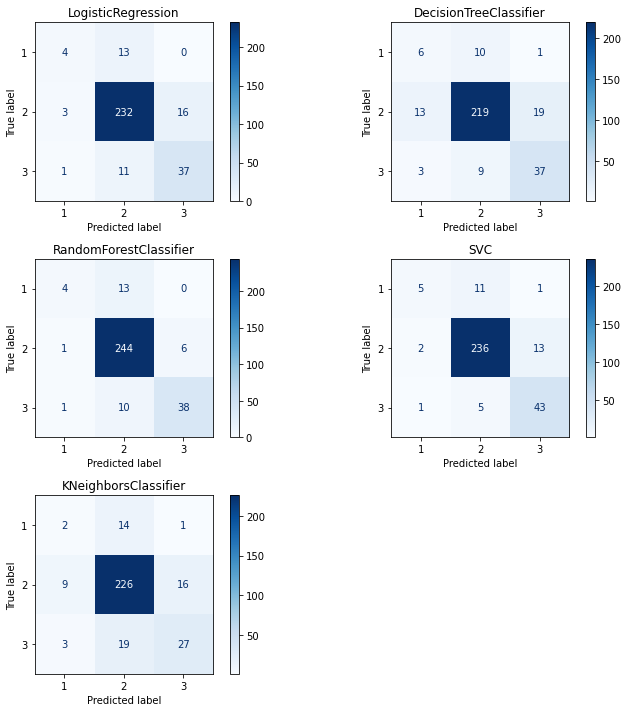

In [42]:
classifier(model)

From the results we see that best accuracy is received with RandomForestClassifier and SVC models 90%.

All models can predict 2nd Quality class pretty good, but not showing good performance with other two classes.

Best precision to predict 1st and 3rd classes is received with RandomForestClassifier - 67% and 86%. While best recall of 29% and 88% is received with SVC.

To receive better results with minority classes other methods should be considered.